In [2]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import gridspec
import matplotlib
from scipy.optimize import curve_fit
import warnings
from scipy.optimize import OptimizeWarning

In [4]:
coeffs_250_mon = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/regress_coeffs/CMIP_coeffs_250_monthlymlotst_2.nc')
coeffs_250_mon.load()

<xarray.DataArray (model: 15, lat: 44, lon: 90, param1: 3, param2: 4)>
array([[[[[ 4.30777070e+00,  4.68529111e+00, -2.81814927e-01,
            2.85101691e-01],
          [-4.28023457e-01, -2.81814927e-01,  2.08123635e-02,
           -2.50688042e-02],
          [ 1.93956111e+00,  2.85101691e-01, -2.50688042e-02,
            3.99486873e-02]],

         [[ 5.81670614e+00,  2.54679363e+01, -6.47931577e-01,
            6.50652337e-01],
          [-4.66487635e-01, -6.47931577e-01,  2.06107277e-02,
           -2.50662482e-02],
          [ 1.97312115e+00,  6.50652337e-01, -2.50662482e-02,
            3.99074746e-02]],

         [[ 5.78099774e+00,  2.38651807e+01, -6.10380072e-01,
            6.11347850e-01],
          [-4.62473028e-01, -6.10380072e-01,  1.95917040e-02,
           -2.38518108e-02],
          [ 1.95544246e+00,  6.11347850e-01, -2.38518108e-02,
            3.81728178e-02]],
...
         [[            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan]],

         [[            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan]],

         [[ 1.55096810e+04,  2.69503086e+21, -5.32759396e+11,
           -1.56225351e+11],
          [-2.95377137e+01, -5.32759396e+11,  1.62509589e+02,
           -8.44234074e+01],
          [ 2.47673800e+02, -1.56225351e+11, -8.44234074e+01,
            3.25949884e+02]]]]])
Coordinates:
  * lon      (lon) int64 1 5 9 13 17 21 25 29 ... 333 337 341 345 349 353 357
  * lat      (lat) int64 -87 -83 -79 -75 -71 -67 -63 ... 61 65 69 73 77 81 85
  * model    (model) object 'E3SM-1-0' 'GFDL-CM4' ... 'FGOALS-g3'
  * param2   (param2) object 'coeff' 'cov1' 'cov2' 'cov3'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'

In [27]:
vert_ds = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/vert_ds.nc')
vert_ds.load()

sst_cont_250 = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/250yeardatasets/CMIP_ts_piControl_2x2_250yr.nc')
sst_cont_250.load()

qs_cont_250 = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/250yeardatasets/CMIP_surface_piControl_2x2_250yr.nc')
qs_cont_250.load()

mlotst_250 = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/250yeardatasets/CMIP_mlotst_piControl_250yr.nc')
mlotst_250.load()

qo_cont_250_mon = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/250yeardatasets/CMIP_ocean_piControl_2x2_monmlotst_250yr_2.nc')
qo_cont_250_mon.load()

<xarray.DataArray (time: 3000, name: 15, lat: 88, lon: 179)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
...
         [-5.23103195e+02, -5.28517502e+02, -5.34291276e+02, ...,
          -5.72450999e+02, -5.88788622e+02, -5.56579869e+02],
         [-4.66353888e+02, -4.92971445e+02, -5.12369234e+02, ...,
          -4.65725918e+02, -4.86108905e+02, -4.79034910e+02],
         [-5.47829486e+02, -5.58791226e+02, -5.66707099e+02, ...,
          -5.59909776e+02, -5.65341360e+02, -5.58656455e+02]],

        [[-3.99079720e+00, -3.99466743e+00, -3.99419938e+00, ...,
          -3.96487647e+00, -3.97739656e+00, -3.98323409e+00],
         [-4.01021198e+00, -4.01678020e+00, -4.06065146e+00, ...,
          -3.88240939e+00, -3.93309087e+00, -3.93787412e+00],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [-1.61758968e+02, -1.50283439e+02, -1.40802631e+02, ...,
          -1.81007840e+02, -1.84034843e+02, -1.78923497e+02],
         [-1.25874489e+02, -1.21185589e+02, -1.18105906e+02, ...,
          -1.35859643e+02, -1.36464367e+02, -1.35426629e+02],
         [-1.14421482e+02, -1.06286392e+02, -9.83473938e+01, ...,
          -1.33828798e+02, -1.32617650e+02, -1.27737351e+02]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 2100-12-31
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'FGOALS-g3' 'IPSL-CM6A-LR'

In [24]:
# Analytical solution

def analytical(params, lagint):
    lambda_o = params['lambda_o'] # Ocean feedback
    lambda_a = params['lambda_a'] # Atmospheric feedback
    sigma_a = params['sigma_a']   # Variance of atmospheric forcing
    sigma_o = params['sigma_o']   # Variance of oceanic forcing
    
    dt = 60*60*24*30 # Timestep - month [s]
        
    lag_series = np.arange(-lagint,lagint,1)*dt
        
    c = c_p*density*mlotst_equator # Heat capacity
    
    w_0 = (lambda_a + lambda_o)/c

    eq_secondhalf = (lambda_a + lambda_o) * 2/(sigma_a**2+sigma_o**2) * np.exp(-w_0*abs(lag_series))
    
    for i in range(len(eq_secondhalf)):
        if lag_series[i]>0:
            eq_secondhalf[i] = 0
        else:
            eq_secondhalf[i] = eq_secondhalf[i]
        
    # r_analytical = -np.exp(-lambda_a*abs(lag_series*dt)/c)*lambda_a
    r_atmos = -lambda_a*np.exp(-w_0*abs(lag_series)) + (eq_secondhalf)*sigma_a**2
    r_ocean = -lambda_o*np.exp(-w_0*abs(lag_series)) + (eq_secondhalf)*sigma_o**2

    return r_atmos, r_ocean

In [31]:
def lagregress(Q, SST, lagint):
    
    lag_series = np.arange(-lagint, lagint, 1)
    lagresponse_q = np.zeros(len(lag_series))
    
    i = 0
    for lag in lag_series:
        if lag < 0:
            lagged_Q = Q.shift(time=-lag).isel(time=slice(-lag,3000))
            lagged_sst = SST.isel(time=slice(-lag,3000))
        elif lag == 0:
            lagged_Q = Q
            lagged_sst = SST.isel(time=slice(0,3000))
        elif lag > 0:
            lagged_Q = Q.shift(time=-lag).isel(time=slice(0,3000-lag))
            lagged_sst = SST.isel(time=slice(0,3000-lag))
        # Remove seasonality
        climatology_sst = lagged_sst.groupby('time.month').mean('time')
        sst_anomalies = lagged_sst.groupby('time.month') - climatology_sst
        climatology_rad = lagged_Q.groupby('time.month').mean('time')
        rad_anomalies = lagged_Q.groupby('time.month') - climatology_rad
        lagresponse_q[i] = np.polyfit(sst_anomalies, rad_anomalies, deg=1)[0]
        i += 1
        
    return lagresponse_q, lag_series

Text(0.5, 1.0, 'lambda_a variance - BCC-ESM1')

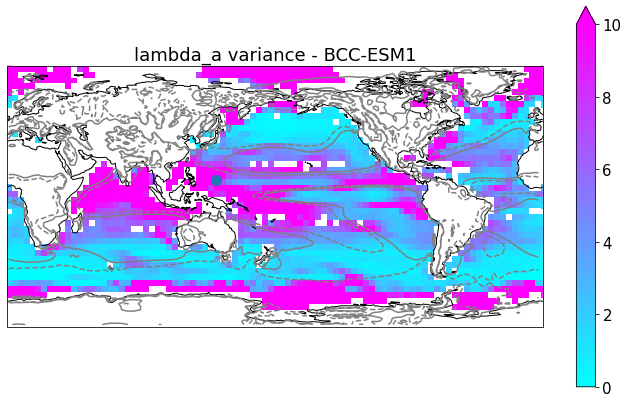

In [49]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
coeffs_250_mon.sel(param1='lambda_a').sel(param2='cov2').sel(model='BCC-ESM1').plot(ax=ax, transform=ccrs.PlateCarree(), 
                                                                 vmin=0, vmax=10, cmap='cool')
ax.coastlines(color='black', linewidth=1)
plt.plot(140, 10, marker='o', markersize=10, transform=ccrs.PlateCarree())
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_a variance - BCC-ESM1')

Text(0.5, 1.0, 'lambda_a (N=15)')

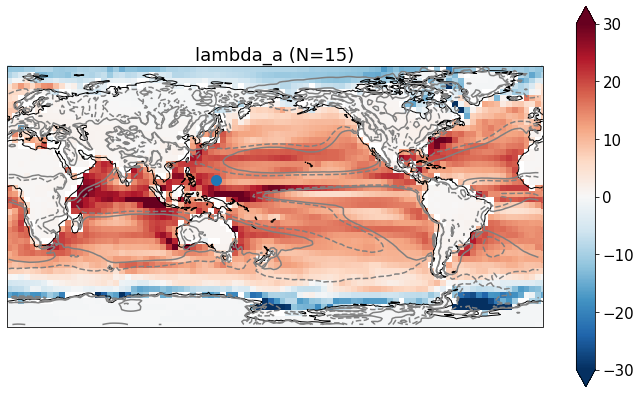

In [41]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
coeffs_250_mon.sel(param1='lambda_a').sel(param2='coeff').mean('model').plot(ax=ax, transform=ccrs.PlateCarree(), 
                                                                 vmin=-30, vmax=30, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
plt.plot(140, 10, marker='o', markersize=10, transform=ccrs.PlateCarree())
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_a (N=15)')

In [42]:
print(coeffs_250_mon.sel(lon=140, method='nearest').sel(lat=10, method='nearest').sel(param2='coeff').mean('model'))

<xarray.DataArray (param1: 3)>
array([ 0.04087265, 16.49257933, -0.15112596])
Coordinates:
    lon      int64 141
    lat      int64 9
    param2   <U5 'coeff'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'


In [50]:
print(coeffs_250_mon.sel(lon=140, method='nearest').sel(lat=10, method='nearest').mean('model'))

<xarray.DataArray (param1: 3, param2: 4)>
array([[ 0.04087265,         inf,         inf,         inf],
       [16.49257933,         inf,         inf,         inf],
       [-0.15112596,         inf,         inf,         inf]])
Coordinates:
    lon      int64 141
    lat      int64 9
  * param2   (param2) object 'coeff' 'cov1' 'cov2' 'cov3'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'


In [44]:
params = {}
params['lambda_a'] = 16.49257933
params['lambda_o'] = -0.15112596
params['sigma_a'] = 1
params['sigma_o'] = 0.04087265
years = 250
lagint = 12*2

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 30*24*60*60 #Time in a week - seconds
mlotst_equator = mlotst_250.sel(lat=10,method='nearest').sel(lon=140,method='nearest'
                                                        ).mean('name').mean('time').values

wp_atm, wp_oce = analytical(params, lagint)

In [45]:
lat = 10
lon = 140
wp_a = lagregress(qs_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'), 
                         sst_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'),
                         lagint = 12*2)

wp_o = lagregress(qo_cont_250_mon.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'), 
                         sst_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'),
                         lagint = 12*2)

Text(0.5, 0.98, '(140,10) - (N=15)')

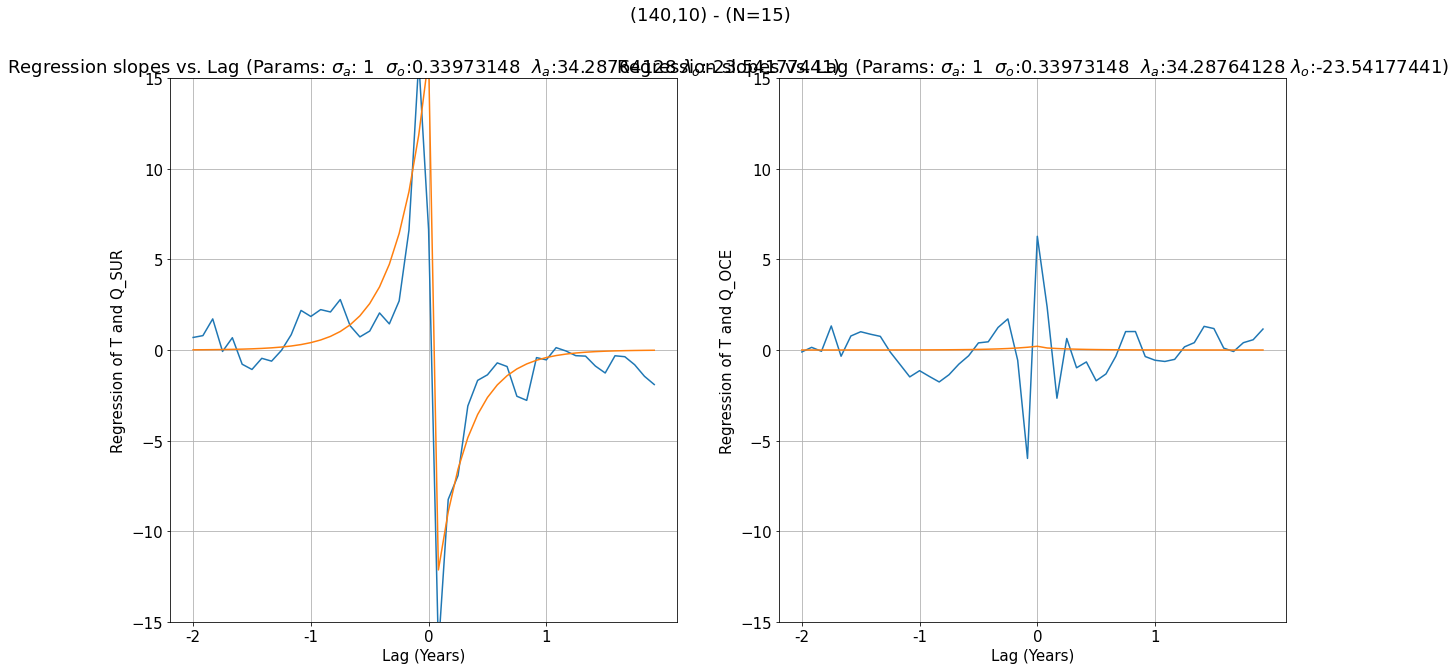

In [55]:
# Using automatic curve fit
plt.rcParams['figure.figsize'] = [20, 10]
fig, (ax,ax2) = plt.subplots(1,2)

font = {'size'   : 15,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

# Atmosphere
ax.plot(wp_a[1], wp_a[0])
ax.plot(wp_a[1], wp_atm)
ax.set_xticks(np.arange(-12*2,12*2,12), np.arange(-2,2,1))
ax.set_ylim(-15,15)
ax.set_xlabel('Lag (Years)')
ax.set_ylabel('Regression of T and Q_SUR')
ax.set_title('Regression slopes vs. Lag (Params: ' + r'$\sigma_a$: ' + str(params['sigma_a']) + r'  $\sigma_o$:' +
                                              str(params['sigma_o']) + r'  $\lambda_a$:' + str(params['lambda_a']) 
                                                 + r' $\lambda_o$:' + str(params['lambda_o']) + ')')
ax.grid()

# Ocean
ax2.plot(wp_o[1], wp_o[0])
ax2.plot(wp_o[1], wp_oce)
ax2.set_xticks(np.arange(-12*2,12*2,12), np.arange(-2,2,1))
ax2.set_ylim(-15,15)
ax2.set_xlabel('Lag (Years)')
ax2.set_ylabel('Regression of T and Q_OCE')
ax2.set_title('Regression slopes vs. Lag (Params: ' + r'$\sigma_a$: ' + str(params['sigma_a']) + r'  $\sigma_o$:' +
                                              str(params['sigma_o']) + r'  $\lambda_a$:' + str(params['lambda_a']) 
                                                 + r' $\lambda_o$:' + str(params['lambda_o']) + ')')
ax2.grid()

plt.suptitle('(140,10) - (N=15)')

Text(0.5, 1.0, 'lambda_a variance - BCC-ESM1')

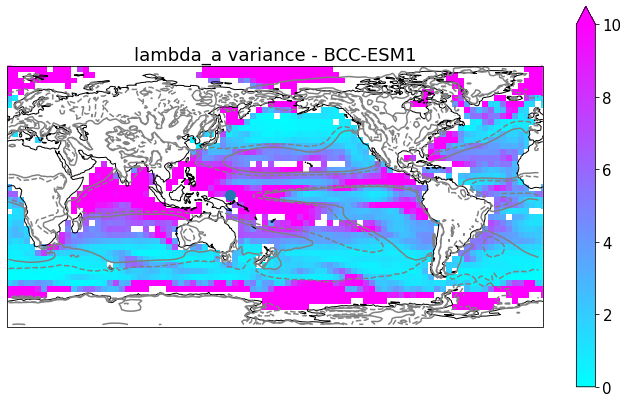

In [68]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
coeffs_250_mon.sel(param1='lambda_a').sel(param2='cov2').sel(model='BCC-ESM1').plot(ax=ax, transform=ccrs.PlateCarree(), 
                                                                 vmin=0, vmax=10, cmap='cool')
ax.coastlines(color='black', linewidth=1)
plt.plot(150,0, marker='o', markersize=10, transform=ccrs.PlateCarree())
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_a variance - BCC-ESM1')

Text(0.5, 1.0, 'lambda_a (N=15)')

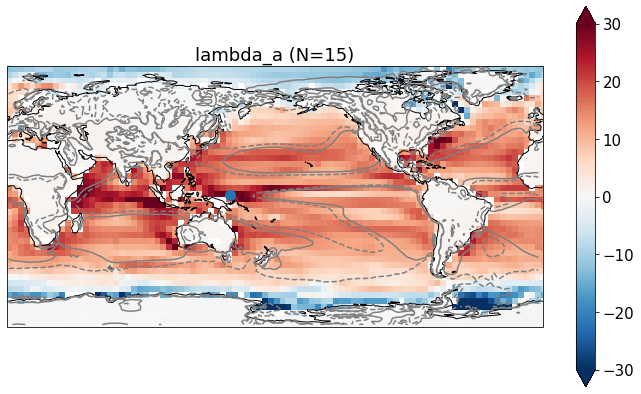

In [63]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
coeffs_250_mon.sel(param1='lambda_a').sel(param2='coeff').mean('model').plot(ax=ax, transform=ccrs.PlateCarree(), 
                                                                 vmin=-30, vmax=30, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
plt.plot(150, 0, marker='o', markersize=10, transform=ccrs.PlateCarree())
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_a (N=15)')

In [51]:
print(coeffs_250_mon.sel(lon=150, method='nearest').sel(lat=0, method='nearest').sel(param2='coeff').mean('model'))

<xarray.DataArray (param1: 3)>
array([  0.33973148,  34.28764128, -23.54177441])
Coordinates:
    lon      int64 149
    lat      int64 1
    param2   <U5 'coeff'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'


In [52]:
print(coeffs_250_mon.sel(lon=150, method='nearest').sel(lat=0, method='nearest').mean('model'))

<xarray.DataArray (param1: 3, param2: 4)>
array([[  0.33973148,          inf,          inf,          inf],
       [ 34.28764128,          inf,          inf,          inf],
       [-23.54177441,          inf,          inf,          inf]])
Coordinates:
    lon      int64 149
    lat      int64 1
  * param2   (param2) object 'coeff' 'cov1' 'cov2' 'cov3'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'


In [53]:
params = {}
params['lambda_a'] = 34.28764128
params['lambda_o'] = -23.54177441
params['sigma_a'] = 1
params['sigma_o'] = 0.33973148
years = 250
lagint = 12*2

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 30*24*60*60 #Time in a week - seconds
mlotst_equator = mlotst_250.sel(lat=0,method='nearest').sel(lon=150,method='nearest'
                                                        ).mean('name').mean('time').values

wp_atm_2, wp_oce_2 = analytical(params, lagint)

In [54]:
lat = 0
lon = 150
wp_a_2 = lagregress(qs_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'), 
                         sst_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'),
                         lagint = 12*2)

wp_o_2 = lagregress(qo_cont_250_mon.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'), 
                         sst_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'),
                         lagint = 12*2)

Text(0.5, 0.98, '(150,0) - (N=15)')

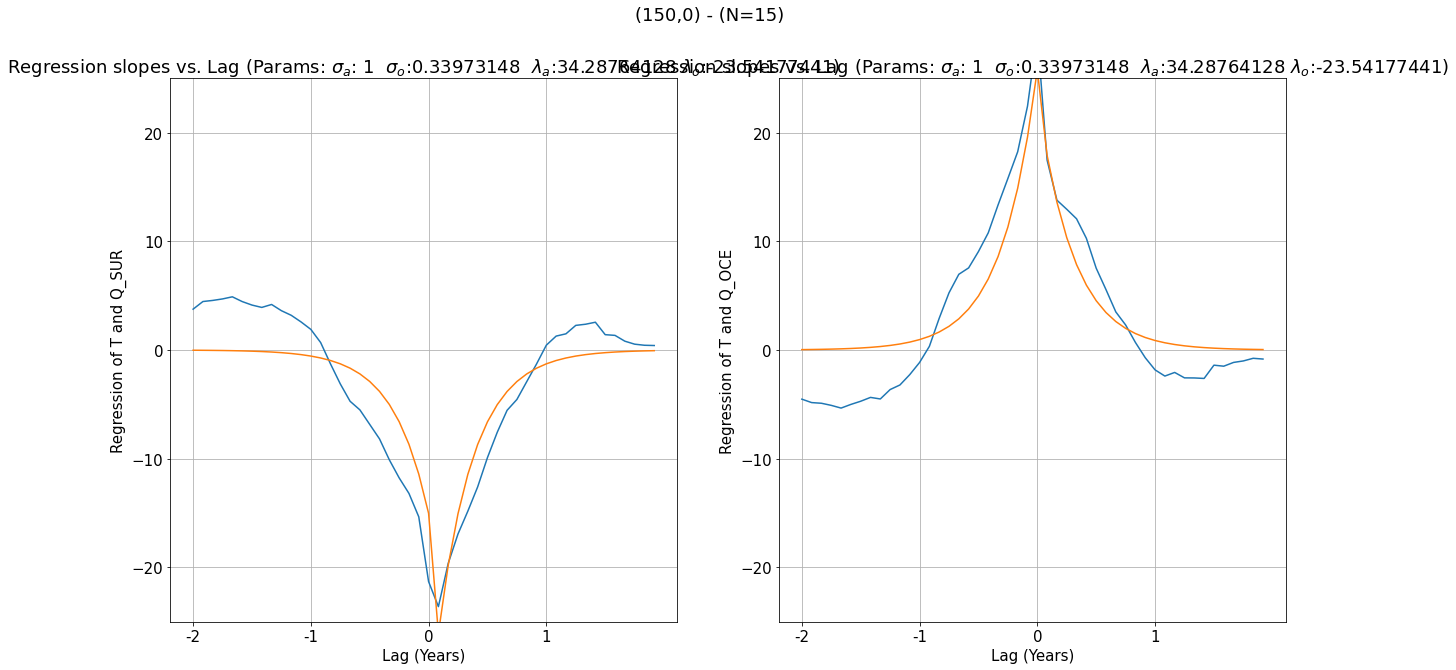

In [57]:
# Using automatic curve fit
plt.rcParams['figure.figsize'] = [20, 10]
fig, (ax,ax2) = plt.subplots(1,2)

font = {'size'   : 15,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

# Atmosphere
ax.plot(wp_a_2[1], wp_a_2[0])
ax.plot(wp_a_2[1], wp_atm_2)
ax.set_xticks(np.arange(-12*2,12*2,12), np.arange(-2,2,1))
ax.set_ylim(-25,25)
ax.set_xlabel('Lag (Years)')
ax.set_ylabel('Regression of T and Q_SUR')
ax.set_title('Regression slopes vs. Lag (Params: ' + r'$\sigma_a$: ' + str(params['sigma_a']) + r'  $\sigma_o$:' +
                                              str(params['sigma_o']) + r'  $\lambda_a$:' + str(params['lambda_a']) 
                                                 + r' $\lambda_o$:' + str(params['lambda_o']) + ')')
ax.grid()

# Ocean
ax2.plot(wp_o_2[1], wp_o_2[0])
ax2.plot(wp_o_2[1], wp_oce_2)
ax2.set_xticks(np.arange(-12*2,12*2,12), np.arange(-2,2,1))
ax2.set_ylim(-25,25)
ax2.set_xlabel('Lag (Years)')
ax2.set_ylabel('Regression of T and Q_OCE')
ax2.set_title('Regression slopes vs. Lag (Params: ' + r'$\sigma_a$: ' + str(params['sigma_a']) + r'  $\sigma_o$:' +
                                              str(params['sigma_o']) + r'  $\lambda_a$:' + str(params['lambda_a']) 
                                                 + r' $\lambda_o$:' + str(params['lambda_o']) + ')')
ax2.grid()

plt.suptitle('(150,0) - (N=15)')

Text(0.5, 1.0, 'lambda_a variance - BCC-ESM1')

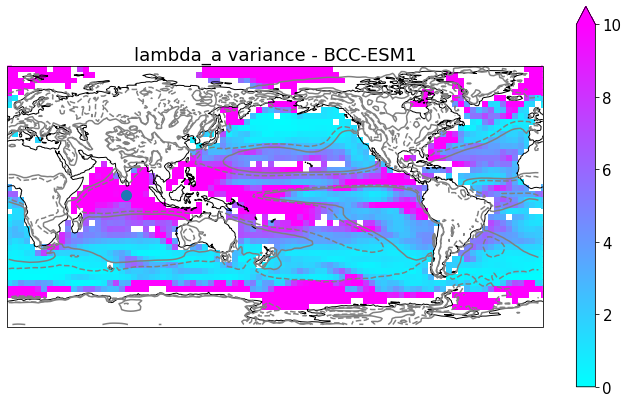

In [69]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
coeffs_250_mon.sel(param1='lambda_a').sel(param2='cov2').sel(model='BCC-ESM1').plot(ax=ax, transform=ccrs.PlateCarree(), 
                                                                 vmin=0, vmax=10, cmap='cool')
ax.coastlines(color='black', linewidth=1)
plt.plot(80,0, marker='o', markersize=10, transform=ccrs.PlateCarree())
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_a variance - BCC-ESM1')

Text(0.5, 1.0, 'lambda_a (N=15)')

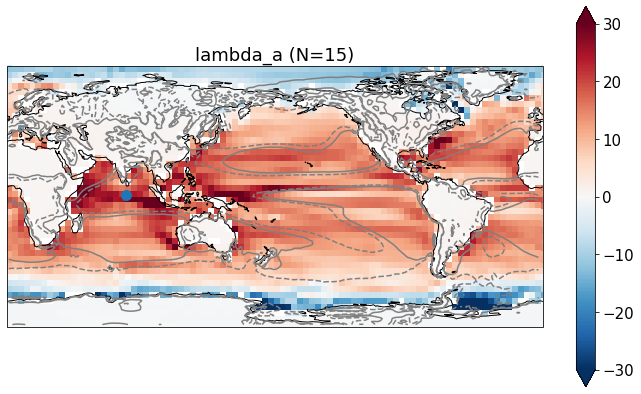

In [70]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
coeffs_250_mon.sel(param1='lambda_a').sel(param2='coeff').mean('model').plot(ax=ax, transform=ccrs.PlateCarree(), 
                                                                 vmin=-30, vmax=30, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
plt.plot(80, 0, marker='o', markersize=10, transform=ccrs.PlateCarree())
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_a (N=15)')

In [71]:
print(coeffs_250_mon.sel(lon=80, method='nearest').sel(lat=0, method='nearest').sel(param2='coeff').mean('model'))

<xarray.DataArray (param1: 3)>
array([ 3.95108247e-03,  2.29695913e+01, -7.26782713e+00])
Coordinates:
    lon      int64 81
    lat      int64 1
    param2   <U5 'coeff'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'


In [72]:
print(coeffs_250_mon.sel(lon=80, method='nearest').sel(lat=0, method='nearest').mean('model'))

<xarray.DataArray (param1: 3, param2: 4)>
array([[ 3.95108247e-03,             inf,             inf,
                    inf],
       [ 2.29695913e+01,             inf,             inf,
                    inf],
       [-7.26782713e+00,             inf,             inf,
                    inf]])
Coordinates:
    lon      int64 81
    lat      int64 1
  * param2   (param2) object 'coeff' 'cov1' 'cov2' 'cov3'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'


In [75]:
params = {}
params['lambda_a'] = 2.29695913e01
params['lambda_o'] = -7.26782713
params['sigma_a'] = 1
params['sigma_o'] = 3.95108247e-03
years = 250
lagint = 12*2

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 30*24*60*60 #Time in a week - seconds
mlotst_equator = mlotst_250.sel(lat=0,method='nearest').sel(lon=80,method='nearest'
                                                        ).mean('name').mean('time').values

io_atm, io_oce = analytical(params, lagint)

In [77]:
lat = 0
lon = 80
io_a = lagregress(qs_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'), 
                         sst_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'),
                         lagint = 12*2)

io_o = lagregress(qo_cont_250_mon.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'), 
                         sst_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'),
                         lagint = 12*2)

Text(0.5, 0.98, '(80,0) - (N=15)')

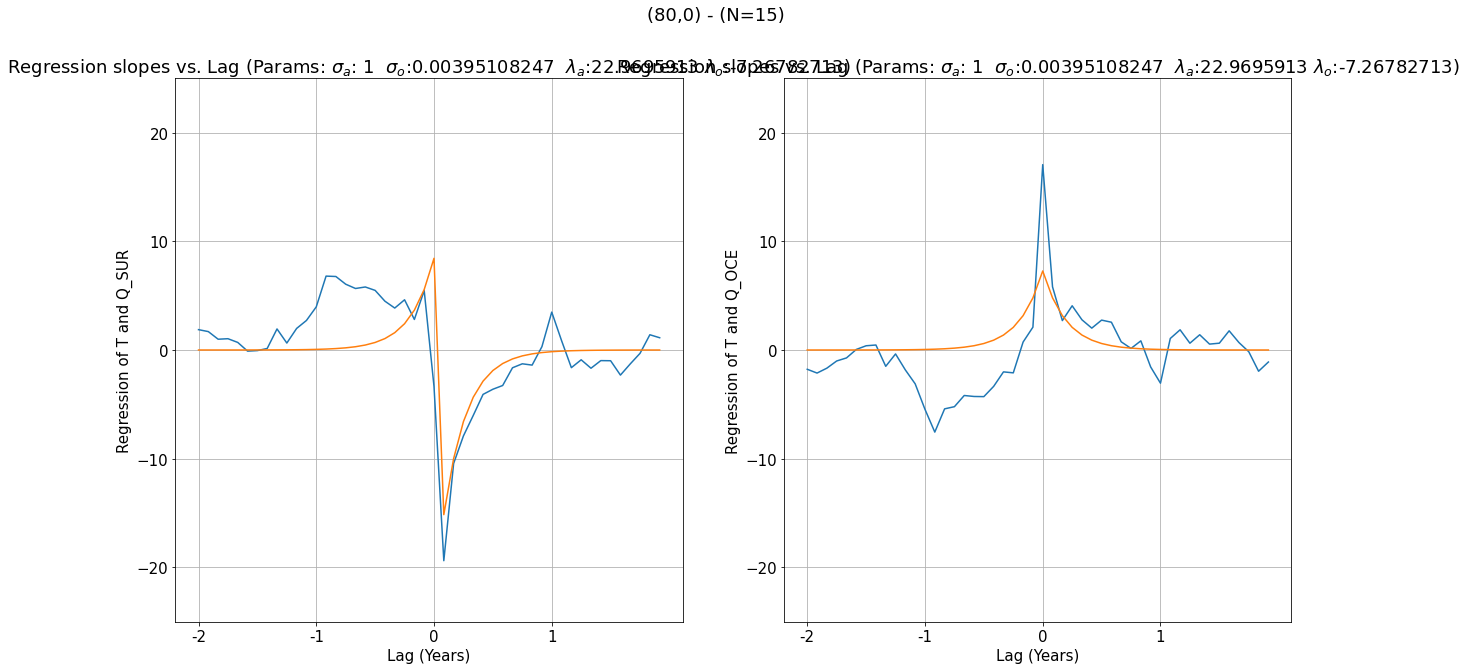

In [79]:
# Using automatic curve fit
plt.rcParams['figure.figsize'] = [20, 10]
fig, (ax,ax2) = plt.subplots(1,2)

font = {'size'   : 15,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

# Atmosphere
ax.plot(io_a[1], io_a[0])
ax.plot(io_a[1], io_atm)
ax.set_xticks(np.arange(-12*2,12*2,12), np.arange(-2,2,1))
ax.set_ylim(-25,25)
ax.set_xlabel('Lag (Years)')
ax.set_ylabel('Regression of T and Q_SUR')
ax.set_title('Regression slopes vs. Lag (Params: ' + r'$\sigma_a$: ' + str(params['sigma_a']) + r'  $\sigma_o$:' +
                                              str(params['sigma_o']) + r'  $\lambda_a$:' + str(params['lambda_a']) 
                                                 + r' $\lambda_o$:' + str(params['lambda_o']) + ')')
ax.grid()

# Ocean
ax2.plot(io_o[1], io_o[0])
ax2.plot(io_o[1], io_oce)
ax2.set_xticks(np.arange(-12*2,12*2,12), np.arange(-2,2,1))
ax2.set_ylim(-25,25)
ax2.set_xlabel('Lag (Years)')
ax2.set_ylabel('Regression of T and Q_OCE')
ax2.set_title('Regression slopes vs. Lag (Params: ' + r'$\sigma_a$: ' + str(params['sigma_a']) + r'  $\sigma_o$:' +
                                              str(params['sigma_o']) + r'  $\lambda_a$:' + str(params['lambda_a']) 
                                                 + r' $\lambda_o$:' + str(params['lambda_o']) + ')')
ax2.grid()

plt.suptitle('(80,0) - (N=15)')

Text(0.5, 1.0, 'lambda_a variance - BCC-ESM1')

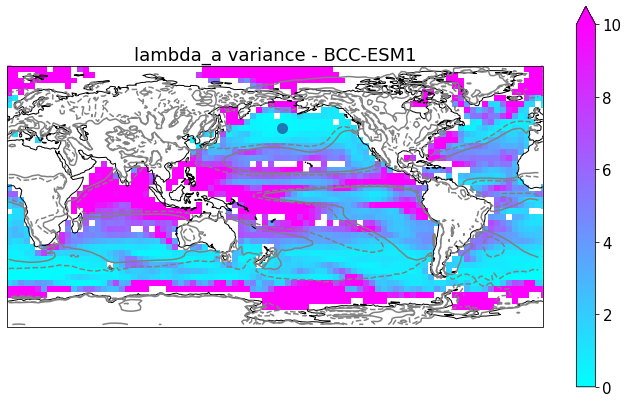

In [99]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
coeffs_250_mon.sel(param1='lambda_a').sel(param2='cov2').sel(model='BCC-ESM1').plot(ax=ax, transform=ccrs.PlateCarree(), 
                                                                 vmin=0, vmax=10, cmap='cool')
ax.coastlines(color='black', linewidth=1)
plt.plot(185,45, marker='o', markersize=10, transform=ccrs.PlateCarree())
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_a variance - BCC-ESM1')

Text(0.5, 1.0, 'lambda_a (N=15)')

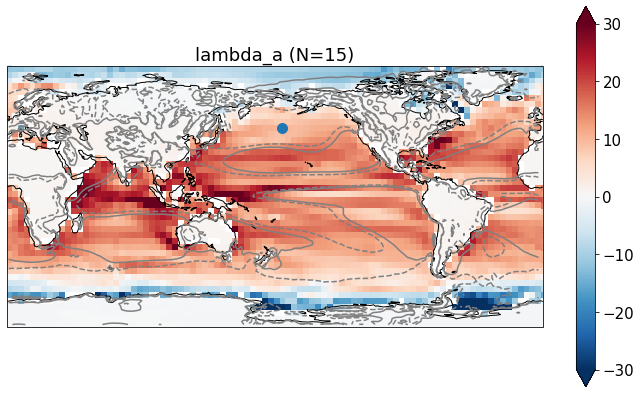

In [100]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
coeffs_250_mon.sel(param1='lambda_a').sel(param2='coeff').mean('model').plot(ax=ax, transform=ccrs.PlateCarree(), 
                                                                 vmin=-30, vmax=30, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
plt.plot(185,45, marker='o', markersize=10, transform=ccrs.PlateCarree())
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_a (N=15)')

In [101]:
print(coeffs_250_mon.sel(lon=185, method='nearest').sel(lat=45, method='nearest').sel(param2='coeff').mean('model'))

<xarray.DataArray (param1: 3)>
array([ 0.44153434, 10.10404594, -2.65661645])
Coordinates:
    lon      int64 185
    lat      int64 45
    param2   <U5 'coeff'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'


In [105]:
print(coeffs_250_mon.sel(lon=185, method='nearest').sel(lat=45, method='nearest').mean('model'))

<xarray.DataArray (param1: 3, param2: 4)>
array([[ 4.41534339e-01,  8.69043775e-03, -1.89489422e-02,
         8.83509689e-03],
       [ 1.01040459e+01, -1.89489422e-02,  4.71890347e-01,
        -1.38155781e-01],
       [-2.65661645e+00,  8.83509689e-03, -1.38155781e-01,
         2.03452226e-01]])
Coordinates:
    lon      int64 185
    lat      int64 45
  * param2   (param2) object 'coeff' 'cov1' 'cov2' 'cov3'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'


In [103]:
params = {}
params['lambda_a'] = 10.10404594
params['lambda_o'] = -2.65661645
params['sigma_a'] = 1
params['sigma_o'] = 0.44153434
years = 250
lagint = 12*2

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 30*24*60*60 #Time in a week - seconds
mlotst_equator = mlotst_250.sel(lat=45,method='nearest').sel(lon=185,method='nearest'
                                                        ).mean('name').mean('time').values

n_atm, n_oce = analytical(params, lagint)

In [104]:
lat = 45
lon = 185
n_a = lagregress(qs_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'), 
                         sst_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'),
                         lagint = 12*2)

n_o = lagregress(qo_cont_250_mon.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'), 
                         sst_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').mean('name'),
                         lagint = 12*2)

Text(0.5, 0.98, '(185,45) - (N=15)')

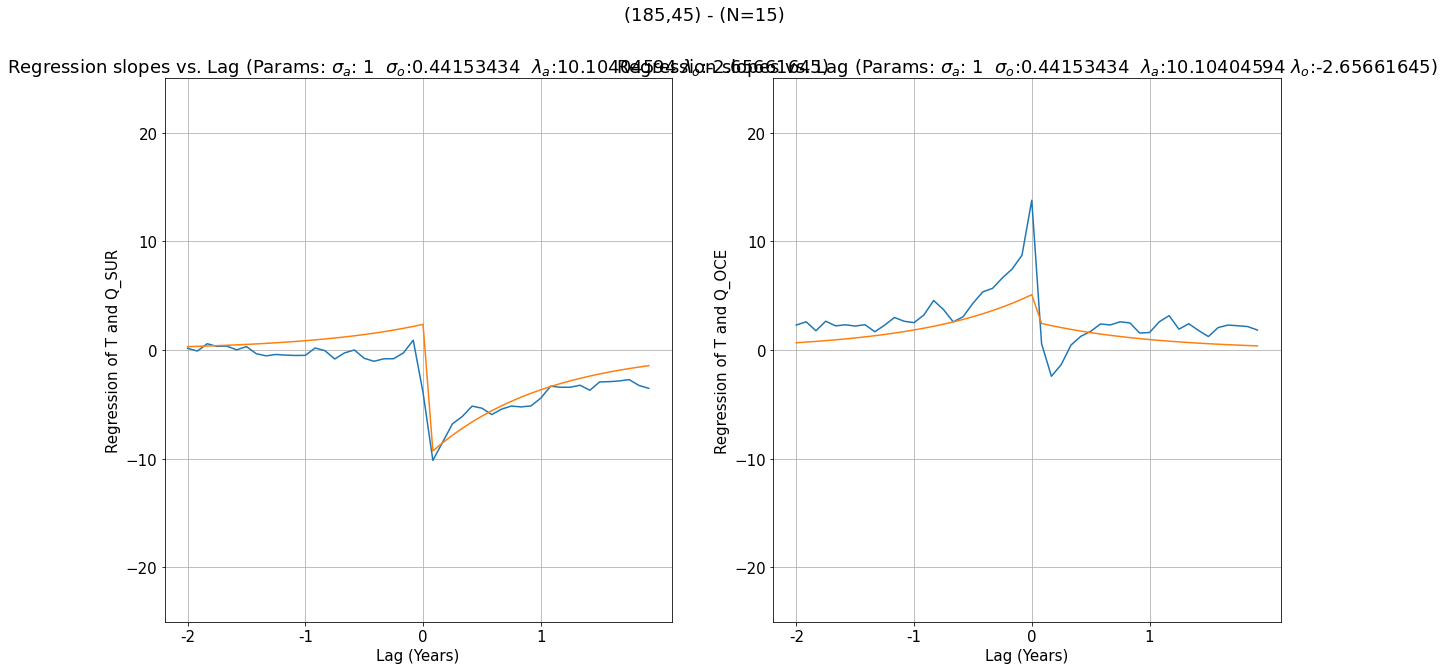

In [107]:
# Using automatic curve fit
plt.rcParams['figure.figsize'] = [20, 10]
fig, (ax,ax2) = plt.subplots(1,2)

font = {'size'   : 15,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

# Atmosphere
ax.plot(n_a[1], n_a[0])
ax.plot(n_a[1], n_atm)
ax.set_xticks(np.arange(-12*2,12*2,12), np.arange(-2,2,1))
ax.set_ylim(-25,25)
ax.set_xlabel('Lag (Years)')
ax.set_ylabel('Regression of T and Q_SUR')
ax.set_title('Regression slopes vs. Lag (Params: ' + r'$\sigma_a$: ' + str(params['sigma_a']) + r'  $\sigma_o$:' +
                                              str(params['sigma_o']) + r'  $\lambda_a$:' + str(params['lambda_a']) 
                                                 + r' $\lambda_o$:' + str(params['lambda_o']) + ')')
ax.grid()

# Ocean
ax2.plot(n_o[1], n_o[0])
ax2.plot(n_o[1], n_oce)
ax2.set_xticks(np.arange(-12*2,12*2,12), np.arange(-2,2,1))
ax2.set_ylim(-25,25)
ax2.set_xlabel('Lag (Years)')
ax2.set_ylabel('Regression of T and Q_OCE')
ax2.set_title('Regression slopes vs. Lag (Params: ' + r'$\sigma_a$: ' + str(params['sigma_a']) + r'  $\sigma_o$:' +
                                              str(params['sigma_o']) + r'  $\lambda_a$:' + str(params['lambda_a']) 
                                                 + r' $\lambda_o$:' + str(params['lambda_o']) + ')')
ax2.grid()

plt.suptitle('(185,45) - (N=15)')

In [108]:
print(coeffs_250_mon.sel(lon=185, method='nearest').sel(lat=45, method='nearest').sel(param2='coeff').sel(model='BCC-ESM1'))

<xarray.DataArray (param1: 3)>
array([ 0.56714339,  9.0140112 , -4.98250577])
Coordinates:
    lon      int64 185
    lat      int64 45
    model    <U8 'BCC-ESM1'
    param2   <U5 'coeff'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'


In [109]:
print(coeffs_250_mon.sel(lon=185, method='nearest').sel(lat=45, method='nearest').sel(model='BCC-ESM1'))

<xarray.DataArray (param1: 3, param2: 4)>
array([[ 5.67143392e-01,  5.08204610e-03, -6.65455287e-03,
         1.22477089e-02],
       [ 9.01401120e+00, -6.65455287e-03,  2.17242485e-01,
        -9.04325427e-02],
       [-4.98250577e+00,  1.22477089e-02, -9.04325427e-02,
         7.21443183e-02]])
Coordinates:
    lon      int64 185
    lat      int64 45
    model    <U8 'BCC-ESM1'
  * param2   (param2) object 'coeff' 'cov1' 'cov2' 'cov3'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'


In [110]:
params = {}
params['lambda_a'] = 9.01401120e+00
params['lambda_o'] = -4.98250577
params['sigma_a'] = 1
params['sigma_o'] = 0.56714339
years = 250
lagint = 12*2

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 30*24*60*60 #Time in a week - seconds
mlotst_equator = mlotst_250.sel(lat=45,method='nearest').sel(lon=185,method='nearest'
                                                        ).sel(name='BCC-ESM1').mean('time').values

n_atm_bcc, n_oce_bcc = analytical(params, lagint)

In [111]:
lat = 45
lon = 185
n_a_bcc = lagregress(qs_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').sel(name='BCC-ESM1'), 
                         sst_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').sel(name='BCC-ESM1'),
                         lagint = 12*2)

n_o_bcc = lagregress(qo_cont_250_mon.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').sel(name='BCC-ESM1'), 
                         sst_cont_250.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').sel(name='BCC-ESM1'),
                         lagint = 12*2)

Text(0.5, 0.98, '(185,45) - BCC-ESM1')

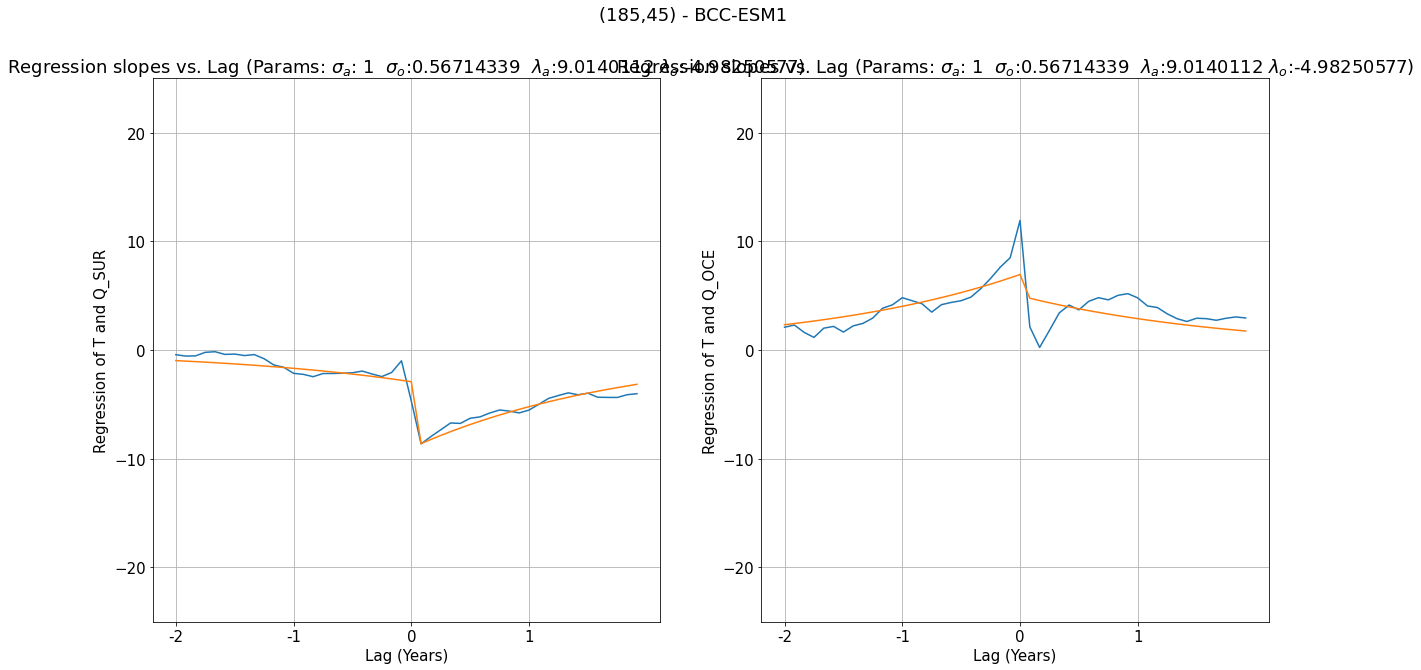

In [112]:
# Using automatic curve fit
plt.rcParams['figure.figsize'] = [20, 10]
fig, (ax,ax2) = plt.subplots(1,2)

font = {'size'   : 15,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

# Atmosphere
ax.plot(n_a_bcc[1], n_a_bcc[0])
ax.plot(n_a_bcc[1], n_atm_bcc)
ax.set_xticks(np.arange(-12*2,12*2,12), np.arange(-2,2,1))
ax.set_ylim(-25,25)
ax.set_xlabel('Lag (Years)')
ax.set_ylabel('Regression of T and Q_SUR')
ax.set_title('Regression slopes vs. Lag (Params: ' + r'$\sigma_a$: ' + str(params['sigma_a']) + r'  $\sigma_o$:' +
                                              str(params['sigma_o']) + r'  $\lambda_a$:' + str(params['lambda_a']) 
                                                 + r' $\lambda_o$:' + str(params['lambda_o']) + ')')
ax.grid()

# Ocean
ax2.plot(n_o_bcc[1], n_o_bcc[0])
ax2.plot(n_o_bcc[1], n_oce_bcc)
ax2.set_xticks(np.arange(-12*2,12*2,12), np.arange(-2,2,1))
ax2.set_ylim(-25,25)
ax2.set_xlabel('Lag (Years)')
ax2.set_ylabel('Regression of T and Q_OCE')
ax2.set_title('Regression slopes vs. Lag (Params: ' + r'$\sigma_a$: ' + str(params['sigma_a']) + r'  $\sigma_o$:' +
                                              str(params['sigma_o']) + r'  $\lambda_a$:' + str(params['lambda_a']) 
                                                 + r' $\lambda_o$:' + str(params['lambda_o']) + ')')
ax2.grid()

plt.suptitle('(185,45) - BCC-ESM1')